In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## No Mineral Data

## Choose Crustal density

In [5]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


## No LP data 

## Raw template for geophysics and Exp Pet

## Expet plot

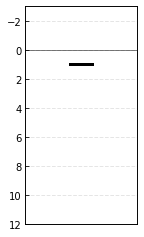

In [6]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
# around 1 kbar
ax1.plot([0.2, 0.3],[1, 1], '-k',  lw=3)


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([0, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])                 
fig.savefig('Expet_Newberry.png', dpi=200, bbox_inches="tight")

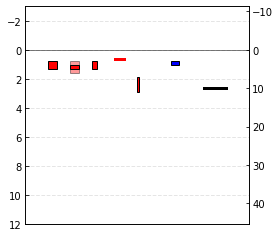

In [10]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches

sep=0.5

### SEISMIC CONSTRAINTS
# Achauer 1988 - 3-5 km depth below the caldera
rect_A1988 = patches.Rectangle((0.5,3),0.2, 2,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_A1988)

# Beachy 2012 - low central velocity at 3-6 km depth. Best fit, molten at 4-5 km depth
rect_B2012 = patches.Rectangle((0.5+sep,3),0.2, 3,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=0.4)
ax2.add_patch(rect_B2012)
rect_B2012_M = patches.Rectangle((0.5+sep,4),0.2, 1,linewidth=1,
                            edgecolor='k',facecolor='red', alpha=1)
ax2.add_patch(rect_B2012_M)

# Heath et al. 2015 - 3-5 km below the crater flow. 

rect_H2015 = patches.Rectangle((0.5+sep*2,3),0.1, 2,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_H2015)

# Heath et al. 2018 - P wave reflectoin at 2.5 km
ax2.plot([0.5+sep*3, 0.5+sep*3+0.2],[2.5, 2.5], '-r',  lw=3)

# LP earthquakes
rect_H2015 = patches.Rectangle((0.5+sep*4,7),0.05, 4,linewidth=1,
                            edgecolor='k',facecolor='red')
ax2.add_patch(rect_H2015)

# MT
rect_BM = patches.Rectangle((0.5+sep*5.5,3),0.2, 1,linewidth=1,
                            edgecolor='k',facecolor='blue')
ax2.add_patch(rect_BM)

# Geodetics.
ax2.plot([0.5+sep*7, 0.5+sep*7+0.5],[10, 10], '-k',  lw=3)

ax1.plot([-1, 8], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([0, 5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_Newberry.png', dpi=200, bbox_inches="tight")

In [22]:
## Same for amphibole

Newberry_read_Amp=pt.import_excel('Newberry.xlsx', sheet_name='Amp_All')
Newberry_Input_Amp=Newberry_read_Amp['my_input']
Newberry_Amp=Newberry_read_Amp['Amps']
Newberry_Amp['Sample_ID_Amp']='Newberry'
Newberry_Amp_copy=Newberry_Amp.copy()
Newberry_Amp_comps=pt.get_amp_sites_from_input(amp_comps=Newberry_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
Newberry_Amp_filt1=Newberry_Amp.loc[( (Newberry_Amp_comps['cation_sum_All'].between(15, 16)) )]
Newberry_Amp_class=pt.classify_phases(df=Newberry_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(Newberry_Amp_class['Phase_Min_Group_ML'].unique())
Newberry_Amp_filt=Newberry_Amp_filt1.loc[Newberry_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
Newberry_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=Newberry_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
Newberry_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=Newberry_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['Amp']


In [23]:
len(Newberry_Amp_Press_NoFilter)

31

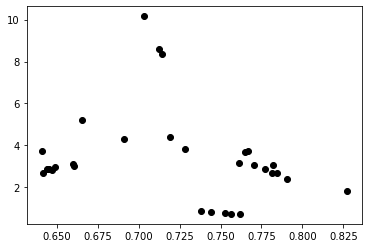

In [24]:
plt.plot(
         (Newberry_Amp_filt['MgO_Amp']/40.3044)/(Newberry_Amp_filt['MgO_Amp']/40.3044+Newberry_Amp_filt['FeOt_Amp']/71.844),
    Newberry_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [25]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Newberry_Amp_filt)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


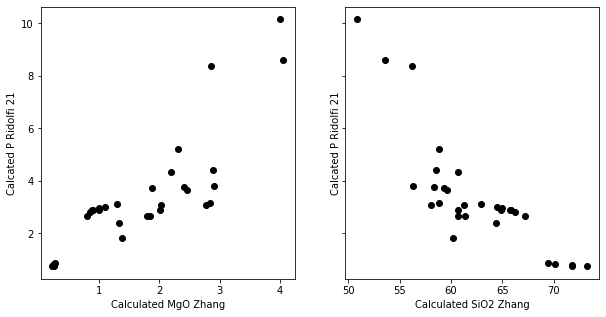

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    Newberry_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    Newberry_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [27]:
#None Filtered
Newberry_Amp_Press_All=Newberry_Amp_Press_NoFilter.copy()
Newberry_Amp_Press_All['Preferred_P']=Newberry_Amp_Press_All['P_kbar_calc']
Newberry_Amp_Press_All['Model']="Ridolfi not filtered"
Newberry_Amp_Press_All['Sample_ID_Amp']="Newberry"

Newberry_Amp_Press_Filt=Newberry_Amp_Press_Filter.copy()
Newberry_Amp_Press_Filt['Preferred_P']=Newberry_Amp_Press_Filt['P_kbar_calc']
Newberry_Amp_Press_Filt['Model']="Ridolfi filtered"
Newberry_Amp_Press_Filt['Sample_ID_Amp']="Newberry"

Combo_Amp=pd.concat([Newberry_Amp_Press_All, Newberry_Amp_Press_Filt], axis=0)

In [28]:
Combo_Amp.to_pickle("Amp_Newberry.pkl")

In [37]:
Newberry_Amp_Press_All['Sample_ID_Amp']

0     Rainier
1     Rainier
2     Rainier
3     Rainier
4     Rainier
5     Rainier
6     Rainier
7     Rainier
8     Rainier
9     Rainier
10    Rainier
11    Rainier
12    Rainier
13    Rainier
14    Rainier
15    Rainier
16    Rainier
17    Rainier
18    Rainier
19    Rainier
20    Rainier
21    Rainier
22    Rainier
23    Rainier
24    Rainier
25    Rainier
26    Rainier
27    Rainier
28    Rainier
29    Rainier
30    Rainier
Name: Sample_ID_Amp, dtype: object

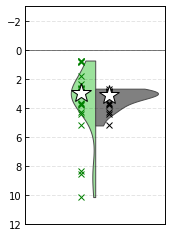

In [38]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.5,4), sharey=True)
ax2 = ax1.twinx()

volc_order=['' 'Newberry']
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Newberry")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Newberry")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Newberry")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Newberry")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Newberry")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Newberry")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")],  
         'x', mec='green')

ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")],  
         'x', mec='k')

ax1.plot(-0.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Newberry_Amp.png', dpi=200)



In [39]:
Newberry_Amp_Press_Filter

,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,...,Fe2_calc,"O=F,Cl",Total,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,APE
0,NaN,False,APE >60,low-Ca,1c+1d,1.998790,18.242268,-5.484626,100.086432,96.260,...,-0.649271,-0.000000,NaN,1.268871,0.703097,0.651710,2.000000,0.082384,N/A,107.111808
1,NaN,False,APE >60,low-Ca,1c+1d,2.003470,20.053239,-7.184161,99.432548,95.420,...,-0.848476,-0.000000,NaN,1.364725,0.712254,0.692743,1.928941,0.037834,N/A,63.416630
2,NaN,False,Low Ca (<1.5),low-Ca,1c+1d,1.991229,14.245130,-2.447950,99.588409,96.170,...,-0.290889,-0.000000,NaN,1.104376,0.714098,0.608530,2.000000,0.136544,N/A,53.345936
3,3.171172,True,,Mg-hastingsite,1b,1.986417,7.228779,2.865453,101.100648,98.390,...,0.341326,-0.000000,NaN,0.912531,0.761360,0.115287,2.000000,0.670039,N/A,51.964039
4,3.664027,True,,Tschermakitic pargasite,(1b+1c)/2,1.988509,9.756445,0.311026,100.125980,97.160,...,0.037010,-0.000000,NaN,0.989611,0.765218,0.320025,2.000000,0.456342,N/A,49.001328
5,5.213857,True,,Mg-hastingsite,1a,1.974871,8.841845,4.623995,101.570711,98.710,...,0.554019,-0.000000,NaN,0.844056,0.665494,0.279259,2.000000,0.503936,N/A,0.000000
6,3.745263,True,,Mg-hastingsite,(1b+1c)/2,1.962440,7.278958,6.930301,101.781698,99.090,...,0.835607,-0.000000,NaN,0.776537,0.641136,0.228196,2.000000,0.607482,N/A,26.279106
7,4.321979,True,,Tschermakitic pargasite,1c,1.972127,7.335599,4.769334,100.857060,98.150,...,0.572228,-0.000000,NaN,0.842112,0.691098,0.249196,2.000000,0.488018,N/A,10.285422
8,4.396070,True,,Mg-hastingsite,(1b+1c)/2,1.979692,6.957510,4.169544,101.066746,98.390,...,0.498353,-0.000000,NaN,0.865101,0.719390,0.216074,2.000000,0.554274,N/A,13.993950
9,2.899669,True,,Tschermakitic pargasite,1b,1.930004,7.717213,6.091953,99.133170,96.430,...,0.746870,-0.000000,NaN,0.795454,0.645055,0.350147,2.000000,0.422817,N/A,45.502012


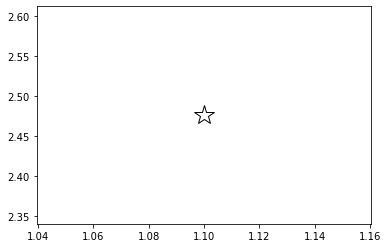

In [26]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")]),  
         '*k', mfc='w', ms=20)

In [25]:
Combo_Amp["Sample_ID_Amp"]

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
             ...       
537    Lassen domefield
538    Lassen domefield
539    Lassen domefield
540    Lassen domefield
541    Lassen domefield
Name: Sample_ID_Amp, Length: 2168, dtype: object

In [24]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Newberry")]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
537   NaN
538   NaN
539   NaN
540   NaN
541   NaN
Name: Preferred_P, Length: 542, dtype: float64